# Lab 8 - st121413
## Akraradet Sinsamersuk

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as signal
from scipy.fftpack import fft, fftshift
plt.style.use('seaborn-whitegrid')


def calFFT(signal, window = 2048 , shift = False , inDB = False, half = True):
    mag = np.abs(fft(signal, window) / (len(signal)/2.0))
    freq = np.linspace(0, 1, len(mag))

    if shift:
        mag = np.abs(fftshift(mag / abs(mag).max() ) )
        freq = np.linspace(-0.5, 0.5, len(mag))
        
    
    if inDB:
        mag = 20 * np.log10( mag )

    if half:
        mag = mag[:len(mag)//2]
        freq = freq[:len(freq)//2]

    return mag, freq

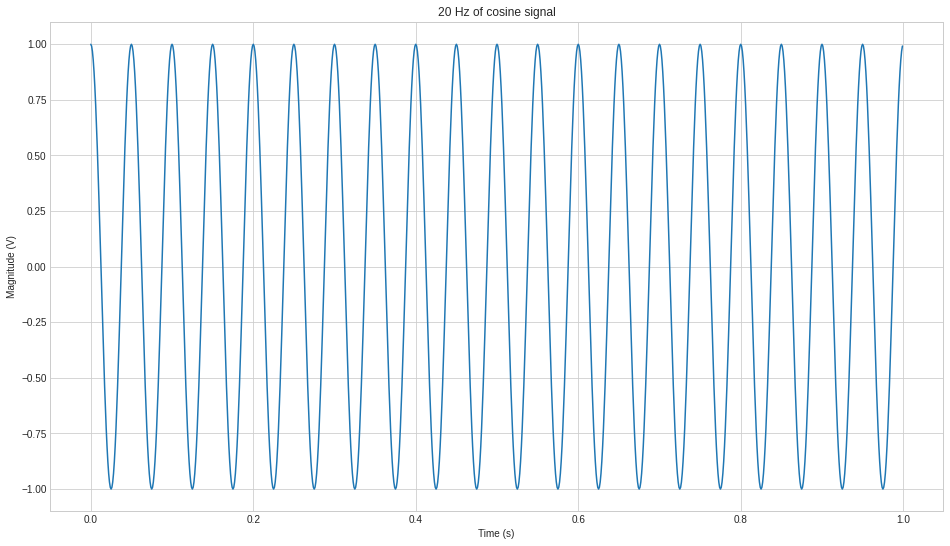

In [2]:
# 1. Using the provided makecos function generate an analog signal with 20 Hz frequency.
f = 20 #Hz
t = np.linspace(0,1,1000, endpoint=False)
cos_20 = np.cos(2 * np.pi * f * t) # COS signal with 20Hz
fig, ax = plt.subplots(1, figsize=(16,9))
ax.plot(t,cos_20)
ax.set_xlabel('Time (s)')
ax.set_ylabel('Magnitude (V)')
ax.set_title('20 Hz of cosine signal')
plt.show()

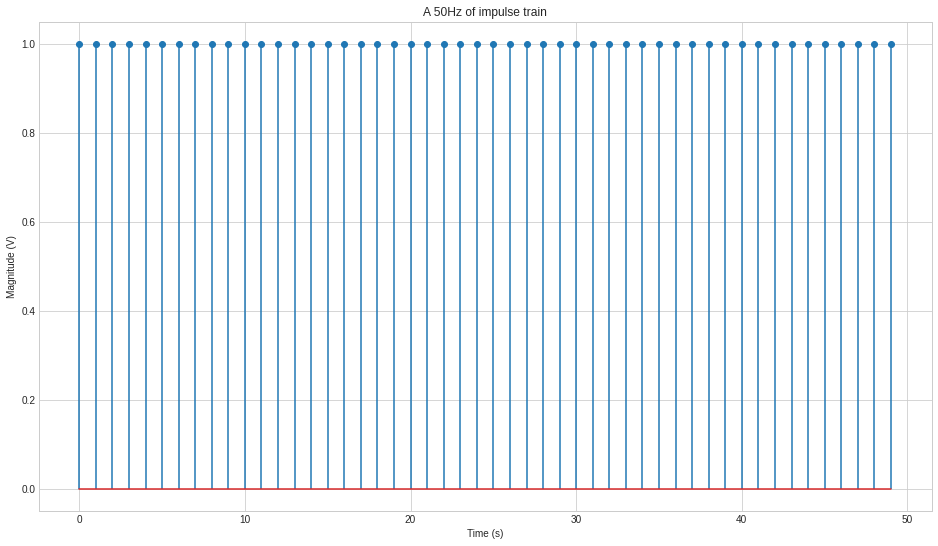

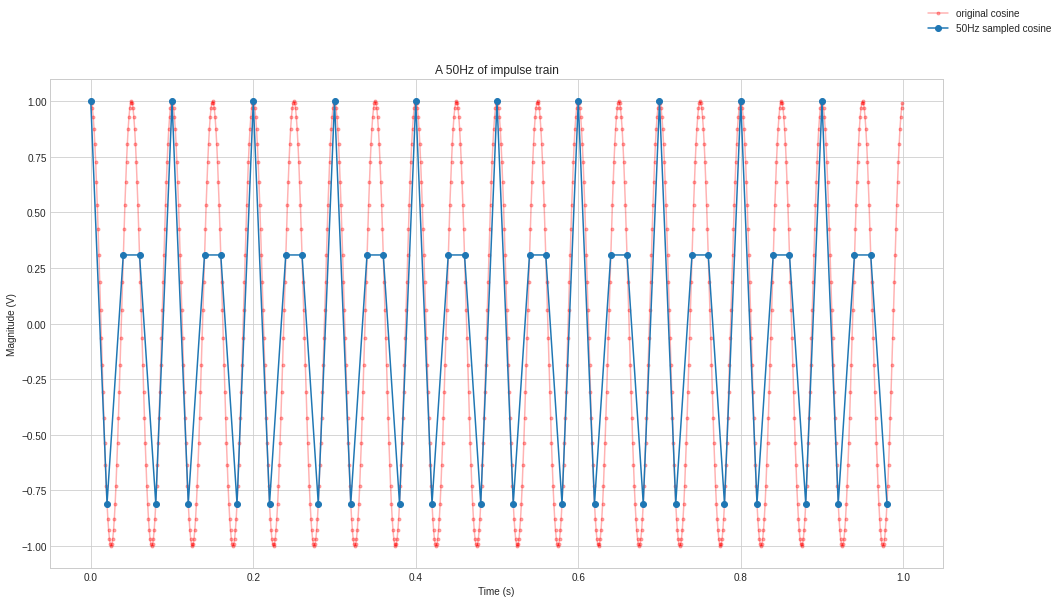

In [3]:
# 2. Sample this signal using a 50 Hz(oversampling) sampling frequency. 
# For this you have to generate an impulse train with frequency 50 Hz with the given makeimp function then use sampleit1 function to sample the signal and finally plot the signal with smpl plot function.

imp_50 = signal.unit_impulse(50, np.arange(0,50))
fig, ax = plt.subplots(1, figsize=(16,9))
ax.stem(imp_50)
ax.set_xlabel('Time (s)')
ax.set_ylabel('Magnitude (V)')
ax.set_title('A 50Hz of impulse train')
plt.show()

cos_50 = signal.resample(cos_20, 50)
t_50 = np.linspace(0, 1, 50, endpoint=False)
fig, ax = plt.subplots(1, figsize=(16,9))
ax.plot(t, cos_20, 'r.-', label = 'original cosine', alpha=0.3)
ax.plot(t_50,cos_50, 'o-', label = '50Hz sampled cosine')
fig.legend()
ax.set_xlabel('Time (s)')
ax.set_ylabel('Magnitude (V)')
ax.set_title('A 50Hz of impulse train')
plt.show()

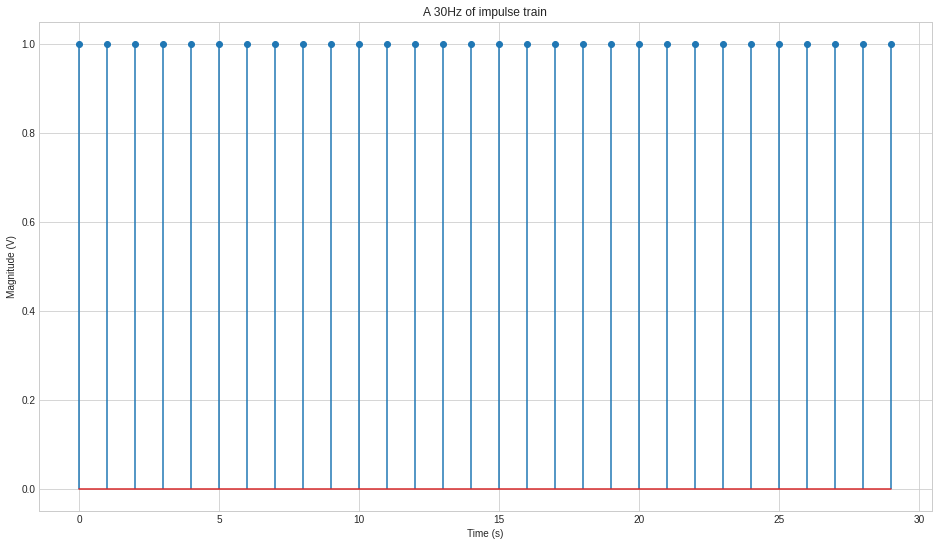

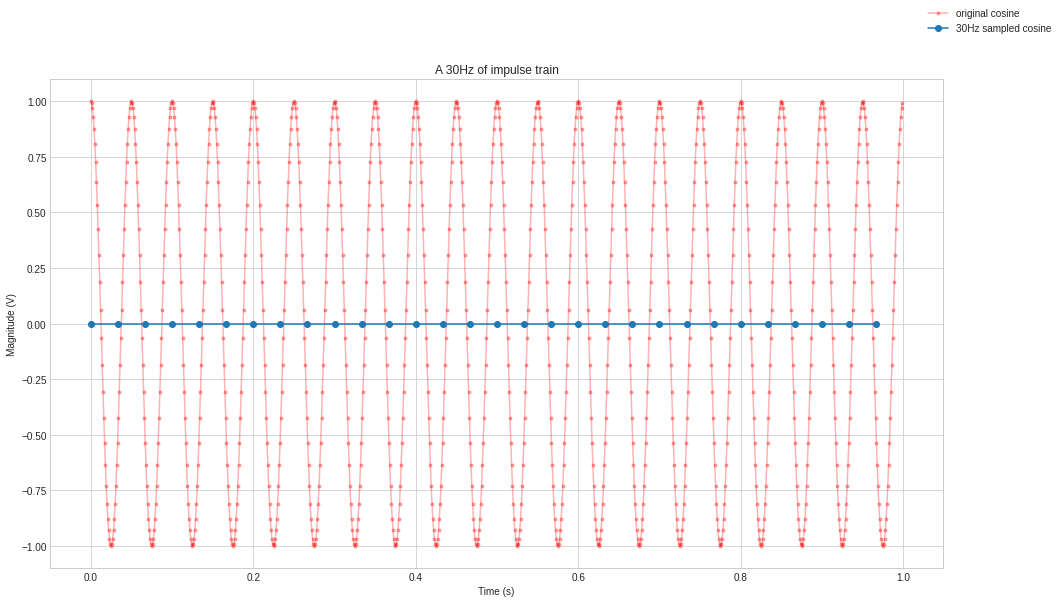

In [4]:
# 3. Sample this signal using a 30 Hz(under sampling) sampling frequency. Use the same
# steps as in the previous step.
imp_30 = signal.unit_impulse(30, np.arange(0,30))
fig, ax = plt.subplots(1, figsize=(16,9))
ax.stem(imp_30)
ax.set_xlabel('Time (s)')
ax.set_ylabel('Magnitude (V)')
ax.set_title('A 30Hz of impulse train')
plt.show()

cos_30 = signal.resample(cos_20, 30)
t_30 = np.linspace(0, 1, 30, endpoint=False)
fig, ax = plt.subplots(1, figsize=(16,9))
ax.plot(t, cos_20, 'r.-', label = 'original cosine', alpha=0.3)
ax.plot(t_30,cos_30, 'o-', label = '30Hz sampled cosine')
fig.legend()
ax.set_xlabel('Time (s)')
ax.set_ylabel('Magnitude (V)')
ax.set_title('A 30Hz of impulse train')
plt.show()




In [5]:
# 4. Using the first sampled signal ms1, original signal can be reconstructed while using ms2 aliasing will occur.

ms1 = cos_50
original = cos_20
ms2 = cos_30

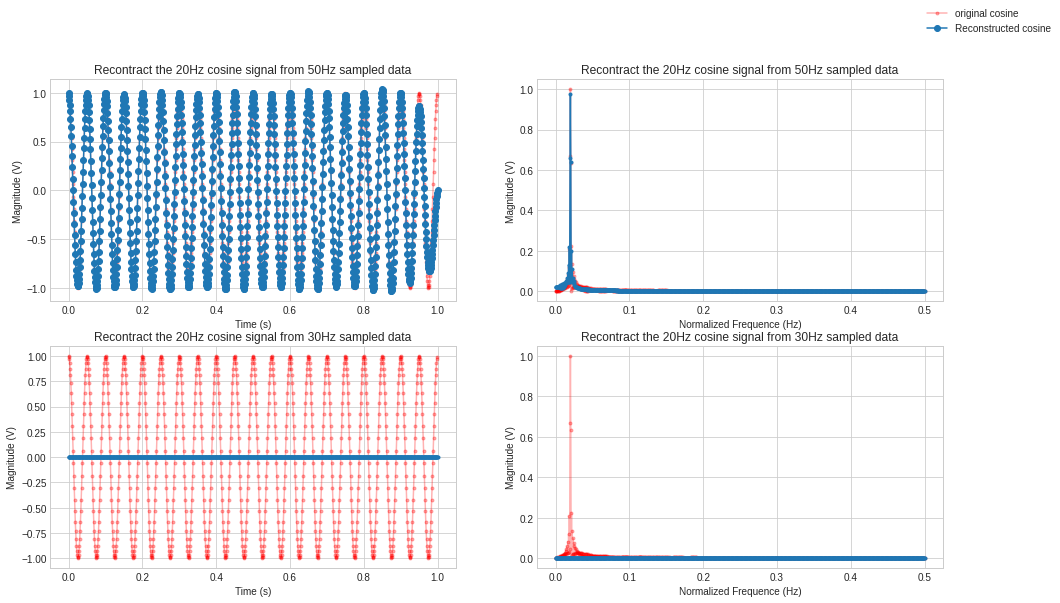

In [54]:
# 5. Reconstruct the signal using the function interpsinc function and plot the waveforms in both time and frequency using recon plot function in order to verify the sampling theory.


# Copy code from https://gist.github.com/endolith/1297227
def sinc_interp(x, s, u):
    """
    Interpolates x, sampled at "s" instants
    Output y is sampled at "u" instants ("u" for "upsampled")
    
    from Matlab:
    http://phaseportrait.blogspot.com/2008/06/sinc-interpolation-in-matlab.html        
    """
    import numpy as np
    if len(x) != len(s):
        raise ValueError('x and s must be the same length')
    
    # Find the period    
    T = s[1] - s[0]
    
    sincM = np.tile(u, (len(s), 1)) - np.tile(s[:, np.newaxis], (1, len(u)))
    y = np.dot(x, np.sinc(sincM/T))
    return y

inter_t = np.linspace(0,1,1000)
inter_cos_50 = sinc_interp(cos_50, t_50, inter_t)

m1,f1 = calFFT(cos_20)
m2,f2 = calFFT(inter_cos_50)

fig, ax = plt.subplots(2,2, figsize=(16,9))
ax[0][0].plot(t, cos_20, 'r.-', label = 'original cosine', alpha=0.3)
ax[0][0].plot(inter_t,inter_cos_50, 'o-', label = 'Reconstructed cosine')
ax[0][0].set_xlabel('Time (s)')
ax[0][0].set_ylabel('Magnitude (V)')
ax[0][0].set_title('Recontract the 20Hz cosine signal from 50Hz sampled data')

ax[0][1].plot(f1, m1, 'r.-', alpha=0.3)
ax[0][1].plot(f2, m2, '.-')
ax[0][1].set_xlabel('Normalized Frequence (Hz)')
ax[0][1].set_ylabel('Magnitude (V)')
ax[0][1].set_title('Recontract the 20Hz cosine signal from 50Hz sampled data')

inter_cos_30 = sinc_interp(cos_30, t_30, inter_t)
m3,f3 = calFFT(inter_cos_30)

ax[1][0].plot(t, cos_20, 'r.-', alpha=0.3)
ax[1][0].plot(inter_t,inter_cos_30, '.-')
ax[1][0].set_xlabel('Time (s)')
ax[1][0].set_ylabel('Magnitude (V)')
ax[1][0].set_title('Recontract the 20Hz cosine signal from 30Hz sampled data')

ax[1][1].plot(f1, m1, 'r.-', alpha=0.3)
ax[1][1].plot(f3, m3, '.-')
ax[1][1].set_xlabel('Normalized Frequence (Hz)')
ax[1][1].set_ylabel('Magnitude (V)')
ax[1][1].set_title('Recontract the 20Hz cosine signal from 30Hz sampled data')



fig.legend()
plt.show()

